#**TITLE: COMPANY SHOULD EXTEND THE CONTRACT OR NOT**

#**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

**Import the files**

In [ ]:
#test=pd.read_csv('test.csv')
#train=pd.read_csv('train.csv')
#https://www.kaggle.com/podsyp/will-the-company-extend-the-service-contract

**Concat the file**

In [ ]:
#contract = pd.concat([test, train])
#contract

In [ ]:
#contract.to_csv("Concat_Contract.csv",index=False)

**Download Concatinated File**

In [ ]:
#from google.colab import files
#files.download('Concat_Contract.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Importing File**

In [2]:
contract=pd.read_csv('Concat_Contract.csv')
contract.head() 

,id,taxactionSystem,regdt,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,OrgCreationDate,documentsCount,cnt_users,is_prolong
0,106879,General taxation system,0.072615741,0,1,0,2,1,31.03.2015,5,1,1
1,108820,Fixed income from profit 6%,25.02.2012,2,1,2,1,1,0.649016204,5,0,1
2,104079,15% flat tax on profits,0.402476852,0,1,1,2,0,0.651782407,6,1,0
3,106924,15% flat tax on profits,0.487858796,1,0,0,0,0,0.196226852,5,0,1
4,106335,Fixed income from profit 5%,0.194039352,3,2,2,2,0,0.192083333,7,0,0


**DATA Description**

**id**	identifier taxactionSystem tax system 

**regdt**  Registration date /n

**workerCount**   number of employees in the company

**fssdccount**   the number of reports sent to the social insurance fund from this organization for its entire existence.

**pfrdcCount**   the number of reports sent to the pension fund from this organization for the entire existence.

**fnsdcCount**   the number of reports sent to the Federal Tax Service from this organization for its entire existence.

**hasCloudCryptCertificate** presence in this organization a cloud certificate is issued

**OrgCreationDate** Date the organization was added. This is not the date of registration of the organization in the Federal Tax Service, etc., this is the date when the organization was added (created)

**documentsCount**  number of documents. Counts the number of documents in the system (which are shown on the "All" tab), not all documents are taken into account in this quantity)

**cnt_users**   the number of users under the contract

Target target must be predicted: **is_prolong**  - the company will extend the contract or not.

**By reading the data decsription we decided to rename the columns for the better understanding of data.**

In [3]:
contract.rename(columns={'fssdccount':'Social_Reports','pfrdcCount':'PensionFund_Reports','fnsdcCount':'FederalTax_reports',
                         'hasCloudCryptCertificate':'CloudCertificate_Issued','is_prolong':'Contract_Extend'},inplace=True)

**Understanding and Visualizing the DATA**

In [4]:
#Checking how many Unique values in particular Columns
contract.nunique()

id                         10168
taxactionSystem               24
regdt                       3455
workerCount                    7
Social_Reports                 4
PensionFund_Reports            5
FederalTax_reports             5
CloudCertificate_Issued        2
OrgCreationDate              757
documentsCount                11
cnt_users                      4
Contract_Extend                2
dtype: int64

In [ ]:
#Describing the data
contract.describe()

,id,workerCount,Social_Reports,PensionFund_Reports,FederalTax_reports,CloudCertificate_Issued,documentsCount,cnt_users,Contract_Extend
count,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000
mean,105083.500000,0.909618,0.823958,0.835464,1.174666,0.522423,4.092054,0.266522,0.596184
std,2935.393103,1.030275,0.831589,0.943038,1.035411,0.499522,2.739355,0.488052,0.490686
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102541.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,105083.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000
75%,107625.250000,2.000000,2.000000,2.000000,2.000000,1.000000,6.000000,0.000000,1.000000
max,110167.000000,6.000000,3.000000,4.000000,4.000000,1.000000,10.000000,3.000000,1.000000


In [ ]:
contract.dtypes

id                          int64
taxactionSystem            object
regdt                      object
workerCount                 int64
Social_Reports              int64
PensionFund_Reports         int64
FederalTax_reports          int64
CloudCertificate_Issued     int64
OrgCreationDate            object
documentsCount              int64
cnt_users                   int64
Contract_Extend             int64
dtype: object

In [ ]:
contract.head()

,id,taxactionSystem,regdt,workerCount,Social_Reports,PensionFund_Reports,FederalTax_reports,CloudCertificate_Issued,OrgCreationDate,documentsCount,cnt_users,Contract_Extend
0,106879,General taxation system,0.072615741,0,1,0,2,1,31.03.2015,5,1,1
1,108820,Fixed income from profit 6%,25.02.2012,2,1,2,1,1,0.649016204,5,0,1
2,104079,15% flat tax on profits,0.402476852,0,1,1,2,0,0.651782407,6,1,0
3,106924,15% flat tax on profits,0.487858796,1,0,0,0,0,0.196226852,5,0,1
4,106335,Fixed income from profit 5%,0.194039352,3,2,2,2,0,0.192083333,7,0,0


***Here We can observe that 59% of the Contract should extend and the remaining contracts like 41% should not be extend.***

In [ ]:
contract['Contract_Extend'].value_counts(normalize=True)

1    0.596184
0    0.403816
Name: Contract_Extend, dtype: float64

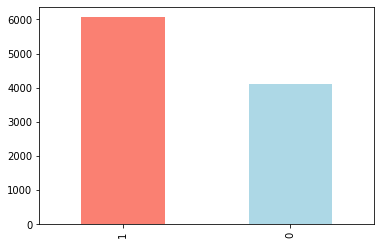

In [ ]:
contract.Contract_Extend.value_counts().plot(kind="bar", color=["salmon", "lightblue"],label='value_counts')

**Seperating the Categorical and the Continues values in diffrent list for the Visualization.**

In [ ]:
categorical_values = []
continous_values = []
for column in contract.columns:
    print(f"{column} : {contract[column].unique()}")
    if len(contract[column].unique()) <= 10:
        categorical_values.append(column)
    else:
        continous_values.append(column)

id : [106879 108820 104079 ... 107161 104526 106191]
taxactionSystem : ['General taxation system' 'Fixed income from profit 6%'
 '15% flat tax on profits' 'Fixed income from profit 5%'
 'Fixed tax 6% on income'
 'Fixed tax 6% on income +Single tax on imputed income'
 'Fixed income from profit 7%' 'Fixed income from profit 125%'
 'Tax patent 3%' 'Fixed income from profit 10%'
 'Single tax on imputed income'
 '15% flat tax on profits +Single tax on imputed income'
 'Fixed income from profit 10% +Single tax on imputed income'
 'Tax patent 3% +Single tax on imputed income'
 'Fixed income from profit 125% +Single tax on imputed income'
 'Fixed income from profit 7% +Single tax on imputed income'
 'Fixed income from profit 5% +Single tax on imputed income'
 'Fixed income from profit 13%' 'Fixed income from profit 75%'
 'Fixed income from profit 12%' 'Tax patent 5%'
 'Fixed income from profit 9%' 'Tax patent 4%'
 'Fixed income from profit 12% +Single tax on imputed income']
regdt : ['0.072615

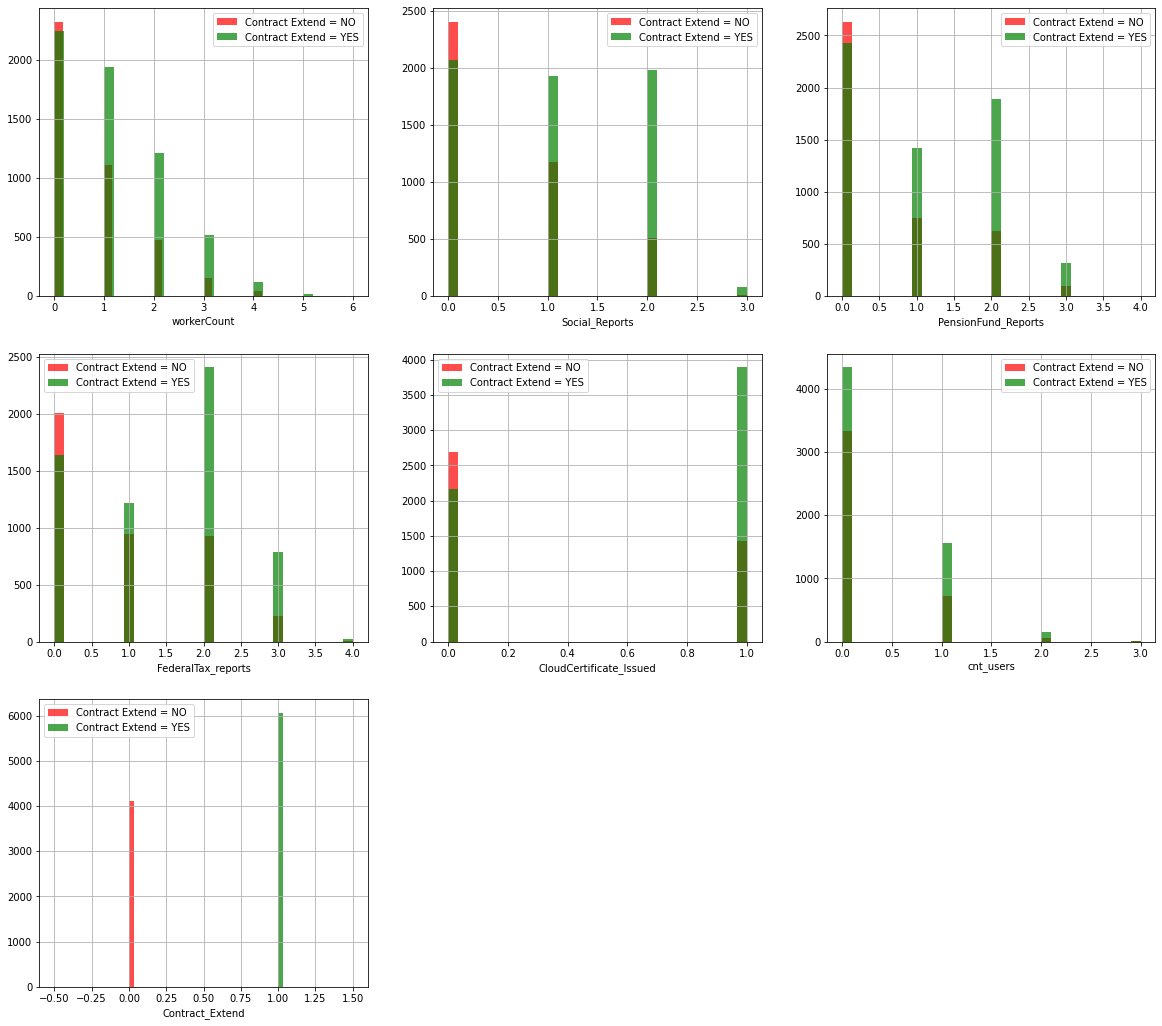

In [ ]:
plt.figure(figsize=(20, 18))

for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    contract[contract["Contract_Extend"] == 0][column].hist(bins=30, color='red', label='Contract Extend = NO', alpha=0.7)
    contract[contract["Contract_Extend"] == 1][column].hist(bins=30, color='green', label='Contract Extend = YES', alpha=0.7)
    plt.legend()
    plt.xlabel(column)

#Observation From the above Histograms::

-**Workercount**: If the count of the workercount of the company is 0 there would be equal chances of extending the contract or cancelling the contract whatever contract have.But if the workercount is 1,2 and 3 then the chances of extending contract is 50% more the canceling the contract.

-**Reports(SocialReports,PensionFund_reports and FederalTax_reports)**: Here if the Reports count is 0 then the contract should be cancel or drop. And if the Report count is greater than 0 then contract should be extend.

-**CloudCertificate_Issued**: If any contract has recieved any cloudcertificate then there is more chances of getting contract extend. If the Certificate not recieved then no chances of extending the contract.

-**cnt_Users**(Count of Users in contract): Here if the count of the users is less then the contract should extend for the company Revenue..

-**Contract_Extend**(Target): Here 0 represented that contract should not be increases and 1 represented the contract of company should be extended.

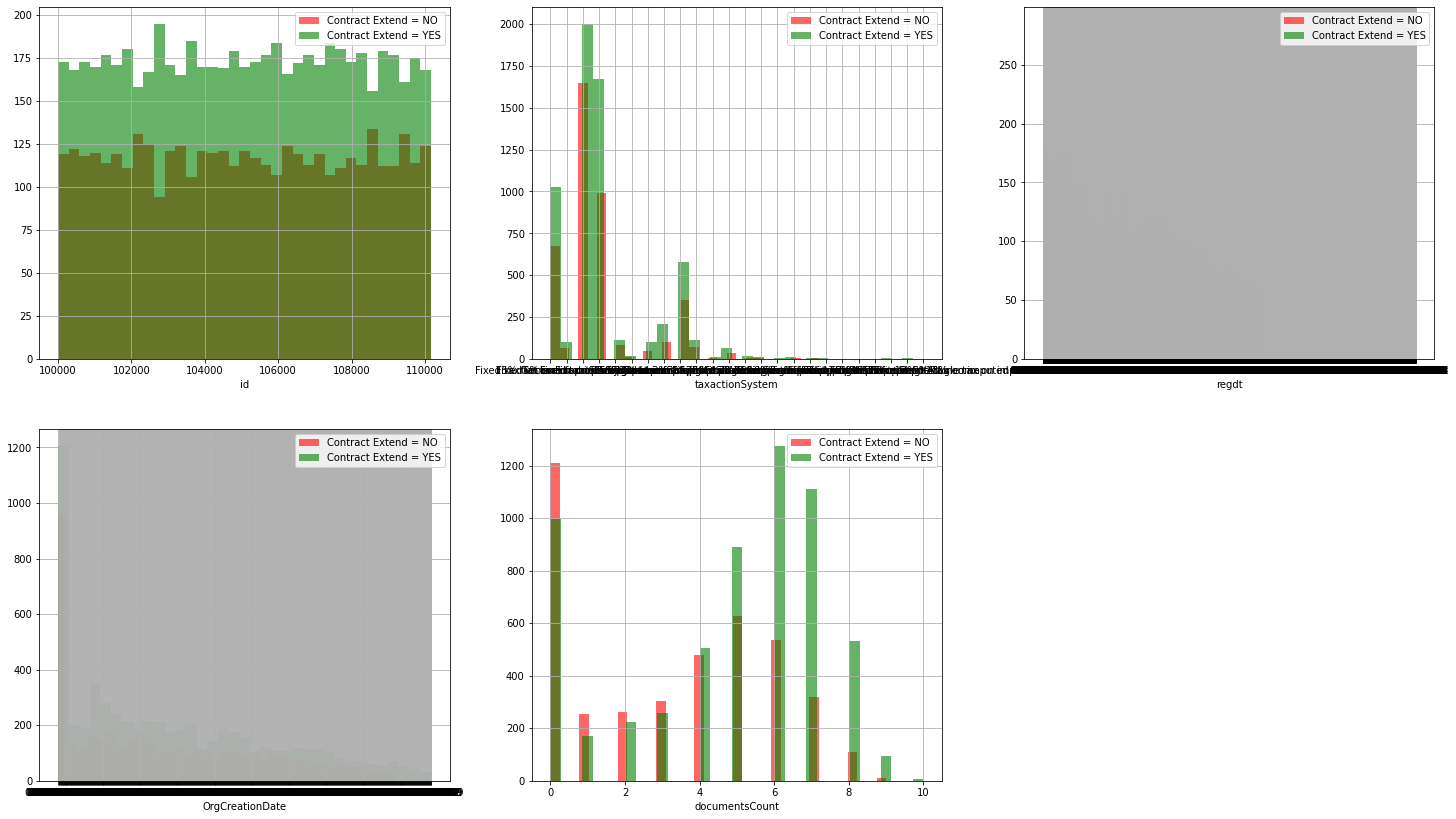

In [ ]:
plt.figure(figsize=(25, 22))

for i, column in enumerate(continous_values, 1):
    plt.subplot(3, 3, i)
    contract[contract["Contract_Extend"] == 0][column].hist(bins=35, color='red', label='Contract Extend = NO', alpha=0.6)
    contract[contract["Contract_Extend"] == 1][column].hist(bins=35, color='green', label='Contract Extend = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

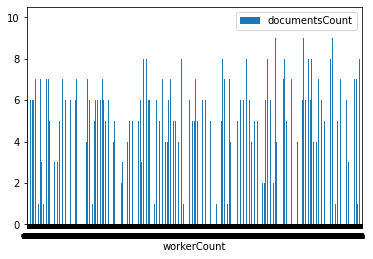

In [ ]:
contract.plot.bar(x='workerCount',y='documentsCount')
#plot.bar()

#**Data Cleaning**

**Checking the Null values in the Columns**

In [ ]:
contract.isnull().sum()

id                          0
taxactionSystem             0
regdt                      27
workerCount                 0
Social_Reports              0
PensionFund_Reports         0
FederalTax_reports          0
CloudCertificate_Issued     0
OrgCreationDate             0
documentsCount              0
cnt_users                   0
Contract_Extend             0
dtype: int64

**Drop the Unnecessary Columns**

*In "regdt" column there is 27 null values present but we don't need to fill the NA values in 'regdt'*

*Because We are dropping the date related columns and there is no need of date related works.*

*Id column is not important for the classification so we dropped id column also.*

In [5]:
contract.drop(['id','regdt','OrgCreationDate'],axis=1,inplace=True)

**Checking the Data types of Each Columns**

*Here taxactionSystem columns having object data type so we are not going to convert it into int.*

*This is an important Column therefore we will perform label encoding on this column...*

In [ ]:
contract.dtypes

taxactionSystem            object
workerCount                 int64
Social_Reports              int64
PensionFund_Reports         int64
FederalTax_reports          int64
CloudCertificate_Issued     int64
documentsCount              int64
cnt_users                   int64
Contract_Extend             int64
dtype: object

In [ ]:
contract.shape

(10168, 9)

**Here we are checking the Unique values from the 'taxactionSystem' column.**

In [ ]:
a=contract['taxactionSystem'].unique()
count=0
for i in a:
  count=count+1
print(count)
contract['taxactionSystem'].unique()

24


array(['General taxation system', 'Fixed income from profit 6%',
       '15% flat tax on profits', 'Fixed income from profit 5%',
       'Fixed tax 6% on income',
       'Fixed tax 6% on income +Single tax on imputed income',
       'Fixed income from profit 7%', 'Fixed income from profit 125%',
       'Tax patent 3%', 'Fixed income from profit 10%',
       'Single tax on imputed income',
       '15% flat tax on profits +Single tax on imputed income',
       'Fixed income from profit 10% +Single tax on imputed income',
       'Tax patent 3% +Single tax on imputed income',
       'Fixed income from profit 125% +Single tax on imputed income',
       'Fixed income from profit 7% +Single tax on imputed income',
       'Fixed income from profit 5% +Single tax on imputed income',
       'Fixed income from profit 13%', 'Fixed income from profit 75%',
       'Fixed income from profit 12%', 'Tax patent 5%',
       'Fixed income from profit 9%', 'Tax patent 4%',
       'Fixed income from profit 

**Get_dummies of Column= "taxactionSystem"**

In [6]:
contract=pd.get_dummies(contract,columns=['taxactionSystem'])

In [7]:
contract

,workerCount,Social_Reports,PensionFund_Reports,FederalTax_reports,CloudCertificate_Issued,documentsCount,cnt_users,Contract_Extend,taxactionSystem_15% flat tax on profits,taxactionSystem_15% flat tax on profits +Single tax on imputed income,taxactionSystem_Fixed income from profit 10%,taxactionSystem_Fixed income from profit 10% +Single tax on imputed income,taxactionSystem_Fixed income from profit 12%,taxactionSystem_Fixed income from profit 12% +Single tax on imputed income,taxactionSystem_Fixed income from profit 125%,taxactionSystem_Fixed income from profit 125% +Single tax on imputed income,taxactionSystem_Fixed income from profit 13%,taxactionSystem_Fixed income from profit 5%,taxactionSystem_Fixed income from profit 5% +Single tax on imputed income,taxactionSystem_Fixed income from profit 6%,taxactionSystem_Fixed income from profit 7%,taxactionSystem_Fixed income from profit 7% +Single tax on imputed income,taxactionSystem_Fixed income from profit 75%,taxactionSystem_Fixed income from profit 9%,taxactionSystem_Fixed tax 6% on income,taxactionSystem_Fixed tax 6% on income +Single tax on imputed income,taxactionSystem_General taxation system,taxactionSystem_Single tax on imputed income,taxactionSystem_Tax patent 3%,taxactionSystem_Tax patent 3% +Single tax on imputed income,taxactionSystem_Tax patent 4%,taxactionSystem_Tax patent 5%
0,0,1,0,2,1,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,2,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2,2,2,0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10163,0,0,0,2,1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10164,0,1,2,3,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10165,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10166,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#contract.to_csv("Concat_ContractFinal.csv",index=False)

In [ ]:
#from google.colab import files
#files.download('Concat_ContractFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
contract.nunique()

workerCount                                                                     7
Social_Reports                                                                  4
PensionFund_Reports                                                             5
FederalTax_reports                                                              5
CloudCertificate_Issued                                                         2
documentsCount                                                                 11
cnt_users                                                                       4
Contract_Extend                                                                 2
taxactionSystem_15% flat tax on profits                                         2
taxactionSystem_15% flat tax on profits +Single tax on imputed income           2
taxactionSystem_Fixed income from profit 10%                                    2
taxactionSystem_Fixed income from profit 10% +Single tax on imputed income      2
taxactionSystem_

In [ ]:
contract.shape

(10168, 32)

In [ ]:
contract.columns

Index(['workerCount', 'Social_Reports', 'PensionFund_Reports',
       'FederalTax_reports', 'CloudCertificate_Issued', 'documentsCount',
       'cnt_users', 'Contract_Extend',
       'taxactionSystem_15% flat tax on profits',
       'taxactionSystem_15% flat tax on profits +Single tax on imputed income',
       'taxactionSystem_Fixed income from profit 10%',
       'taxactionSystem_Fixed income from profit 10% +Single tax on imputed income',
       'taxactionSystem_Fixed income from profit 12%',
       'taxactionSystem_Fixed income from profit 12% +Single tax on imputed income',
       'taxactionSystem_Fixed income from profit 125%',
       'taxactionSystem_Fixed income from profit 125% +Single tax on imputed income',
       'taxactionSystem_Fixed income from profit 13%',
       'taxactionSystem_Fixed income from profit 5%',
       'taxactionSystem_Fixed income from profit 5% +Single tax on imputed income',
       'taxactionSystem_Fixed income from profit 6%',
       'taxactionSystem_F

In [ ]:
from sklearn import preprocessing

In [ ]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
#print(contract['taxactionSystem']) 

#LE_TS = preprocessing.LabelEncoder()
#LE_TS = LE_TS.fit(contract['taxactionSystem'])
#ontract['taxactionSystem'] = LE_TS.transform(contract['taxactionSystem'])
#rint(contract['taxactionSystem'])
#LE_TS.inverse_transform(contract['taxactionSystem'])

**Now Checking the Data Types of Columns...**

*Now all the data in the interger or Numeric format.* 

In [ ]:
contract.dtypes

workerCount                                                                    int64
Social_Reports                                                                 int64
PensionFund_Reports                                                            int64
FederalTax_reports                                                             int64
CloudCertificate_Issued                                                        int64
documentsCount                                                                 int64
cnt_users                                                                      int64
Contract_Extend                                                                int64
taxactionSystem_15% flat tax on profits                                        uint8
taxactionSystem_15% flat tax on profits +Single tax on imputed income          uint8
taxactionSystem_Fixed income from profit 10%                                   uint8
taxactionSystem_Fixed income from profit 10% +Single tax on imput

**Analyzing the relation between all the Columns by finding the Correlation.**

In [ ]:
Correlation=contract.corr()

In [ ]:
Correlation

,workerCount,Social_Reports,PensionFund_Reports,FederalTax_reports,CloudCertificate_Issued,documentsCount,cnt_users,Contract_Extend,taxactionSystem_15% flat tax on profits,taxactionSystem_15% flat tax on profits +Single tax on imputed income,taxactionSystem_Fixed income from profit 10%,taxactionSystem_Fixed income from profit 10% +Single tax on imputed income,taxactionSystem_Fixed income from profit 12%,taxactionSystem_Fixed income from profit 12% +Single tax on imputed income,taxactionSystem_Fixed income from profit 125%,taxactionSystem_Fixed income from profit 125% +Single tax on imputed income,taxactionSystem_Fixed income from profit 13%,taxactionSystem_Fixed income from profit 5%,taxactionSystem_Fixed income from profit 5% +Single tax on imputed income,taxactionSystem_Fixed income from profit 6%,taxactionSystem_Fixed income from profit 7%,taxactionSystem_Fixed income from profit 7% +Single tax on imputed income,taxactionSystem_Fixed income from profit 75%,taxactionSystem_Fixed income from profit 9%,taxactionSystem_Fixed tax 6% on income,taxactionSystem_Fixed tax 6% on income +Single tax on imputed income,taxactionSystem_General taxation system,taxactionSystem_Single tax on imputed income,taxactionSystem_Tax patent 3%,taxactionSystem_Tax patent 3% +Single tax on imputed income,taxactionSystem_Tax patent 4%,taxactionSystem_Tax patent 5%
workerCount,1.000000,0.188528,0.245571,0.030659,-0.094200,0.164653,0.038913,0.198818,0.020084,0.026156,0.029180,0.020501,0.013221,0.010497,0.017674,0.008038,0.008038,0.037712,-0.002569,0.035707,0.024974,0.023940,0.011368,0.020123,-0.028008,0.032510,-0.152577,0.175919,0.009110,0.028674,0.014845,0.000870
Social_Reports,0.188528,1.000000,0.794099,0.743836,0.450861,0.315440,0.168932,0.275795,0.030100,0.019900,-0.002403,0.010066,-0.012480,-0.009827,0.020087,0.002969,-0.005464,0.035614,0.004060,-0.004189,0.016714,0.017609,0.010164,-0.009827,-0.006096,-0.007994,-0.032765,-0.003882,-0.008632,-0.010779,0.002969,0.002100
PensionFund_Reports,0.245571,0.794099,1.000000,0.658604,0.382310,0.287383,0.145723,0.238152,0.029747,0.020560,-0.001362,-0.003373,-0.011325,-0.008787,0.029486,0.002447,0.002447,0.046347,0.010100,0.009424,0.024753,0.025681,0.013980,-0.008787,0.010351,0.014245,-0.098678,0.047365,0.000448,0.009829,0.017321,0.012248
FederalTax_reports,0.030659,0.743836,0.658604,1.000000,0.578528,0.363333,0.185229,0.259256,-0.088523,0.026503,-0.032659,0.002815,-0.022536,-0.011252,0.015910,0.004407,-0.009140,-0.000616,0.016094,-0.021334,-0.009864,0.023114,0.001443,-0.011252,-0.117413,0.022656,0.195200,-0.023824,-0.026897,0.006454,0.011181,-0.001673
CloudCertificate_Issued,-0.094200,0.450861,0.382310,0.578528,1.000000,0.279324,0.162683,0.290155,0.003656,0.021464,-0.031515,0.002575,-0.019945,-0.010373,0.013322,0.013411,-0.000630,0.001247,0.024670,-0.014551,0.027679,0.018104,0.009038,-0.010373,0.027406,0.014024,0.011732,-0.097263,0.016646,0.002793,0.013411,0.009482
documentsCount,0.164653,0.315440,0.287383,0.363333,0.279324,1.000000,0.232884,0.266936,0.061868,0.013023,0.031104,0.021020,0.011438,0.003287,0.009673,0.007209,-0.008152,0.045128,0.017956,0.006192,0.073037,0.022782,-0.004288,-0.003954,0.013680,-0.011520,-0.066172,-0.095142,0.029665,0.019937,0.014890,0.006908
cnt_users,0.038913,0.168932,0.145723,0.185229,0.162683,0.232884,1.000000,0.109800,0.024014,-0.009500,0.014688,0.001032,0.001032,-0.005416,-0.007700,-0.007660,-0.007660,0.017582,0.016690,-0.010490,0.012830,0.006659,-0.010834,-0.005416,-0.004833,-0.019502,0.024527,-0.067563,-0.014610,-0.003823,0.006710,0.014905
Contract_Extend,0.198818,0.275795,0.238152,0.259256,0.290155,0.266936,0.109800,1.000000,0.006814,0.010931,0.004400,0.013960,-0.016608,0.008162,0.005950,0.011544,-0.002750,0.002585,0.004869,0.010744,0.026168,0.015248,0.006219,-0.012050,0.038542,-0.002161,-0.073051,0.017492,0.018630,0.006049,0.011544,-0.012050
taxactionSystem_15% flat tax on profits,0.020084,0.030100,0.029747,-0.088523,0.003656,0.061868,0.024014,0.006814,1.000000,-0.044623,-0.0

**HeatMap**

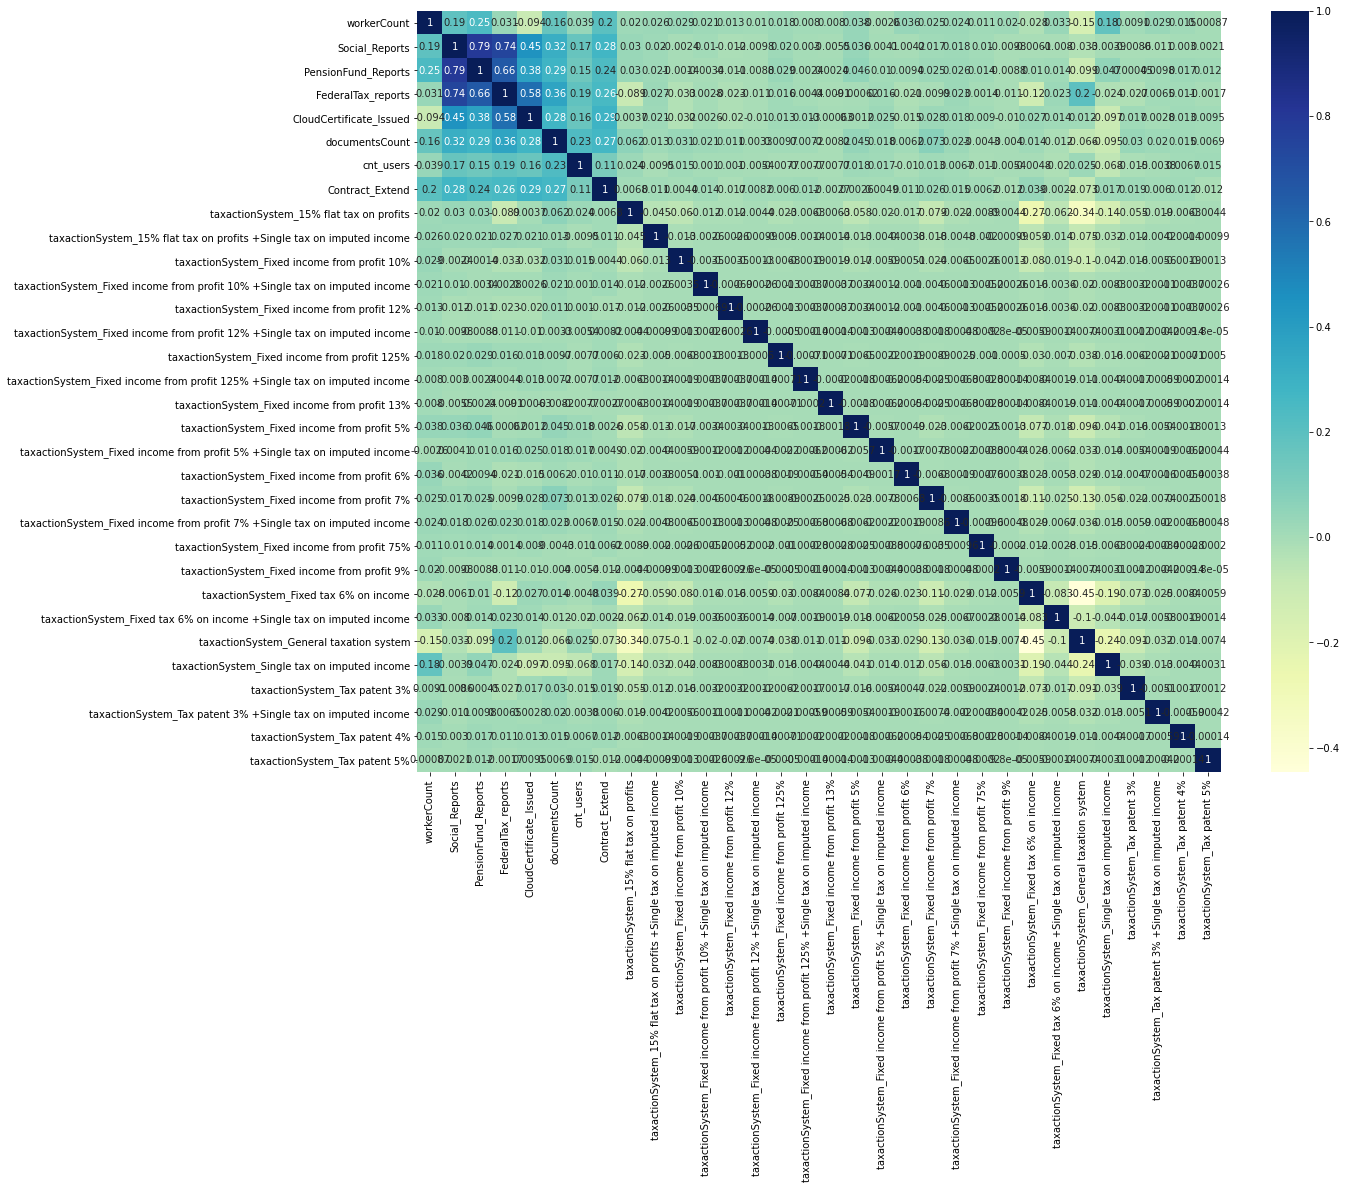

In [ ]:
HM = plt.subplots(figsize=(18,14))
HM=sns.heatmap(Correlation,xticklabels=Correlation.columns, yticklabels=Correlation.columns ,annot=True,cmap="YlGnBu")

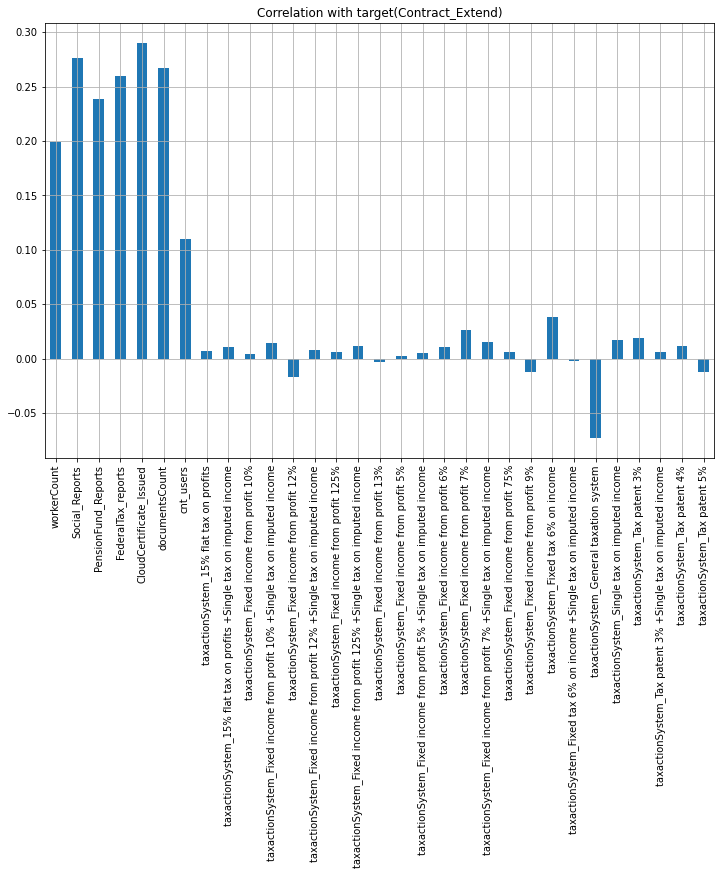

In [ ]:
contract.drop('Contract_Extend', axis=1).corrwith(contract.Contract_Extend).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target(Contract_Extend)")

**PairPlot**

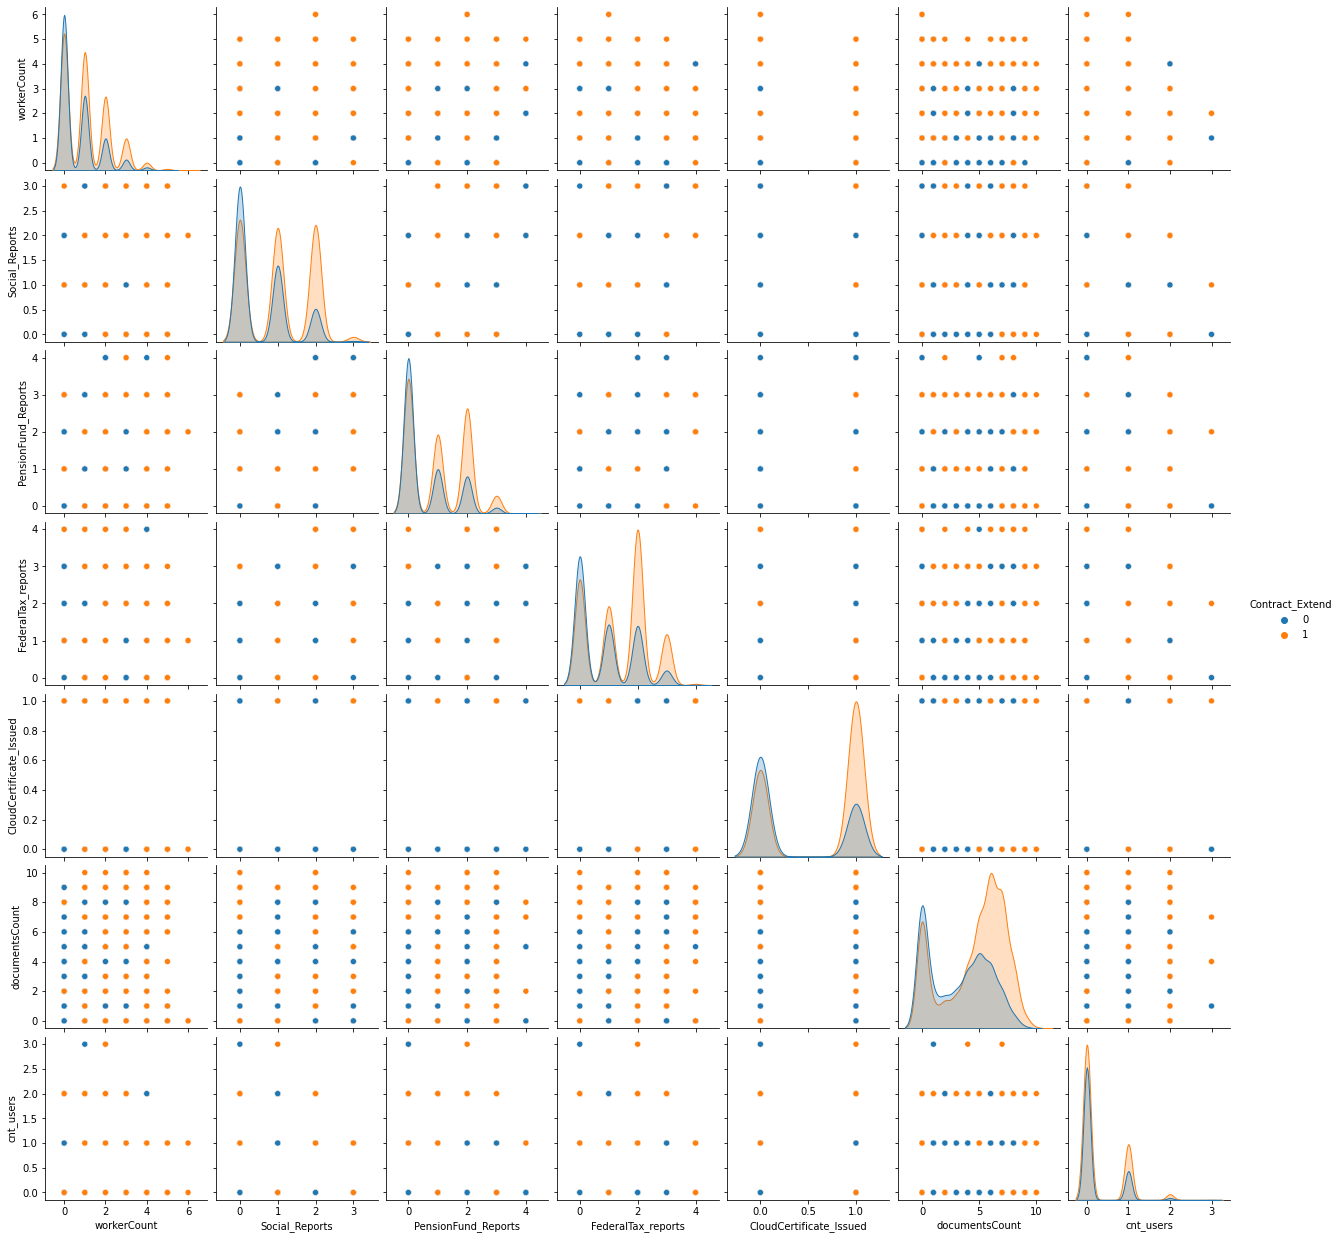

In [ ]:
sns.pairplot(data=contract,vars=('workerCount','Social_Reports','PensionFund_Reports','FederalTax_reports','CloudCertificate_Issued','documentsCount','cnt_users'),hue='Contract_Extend')

**Checking the Outliers in all the Columns**

*After plotting the Boxplot for all the Columns we can Observe that there is some outliers in the taxactionSystem and cnt_users columns.*

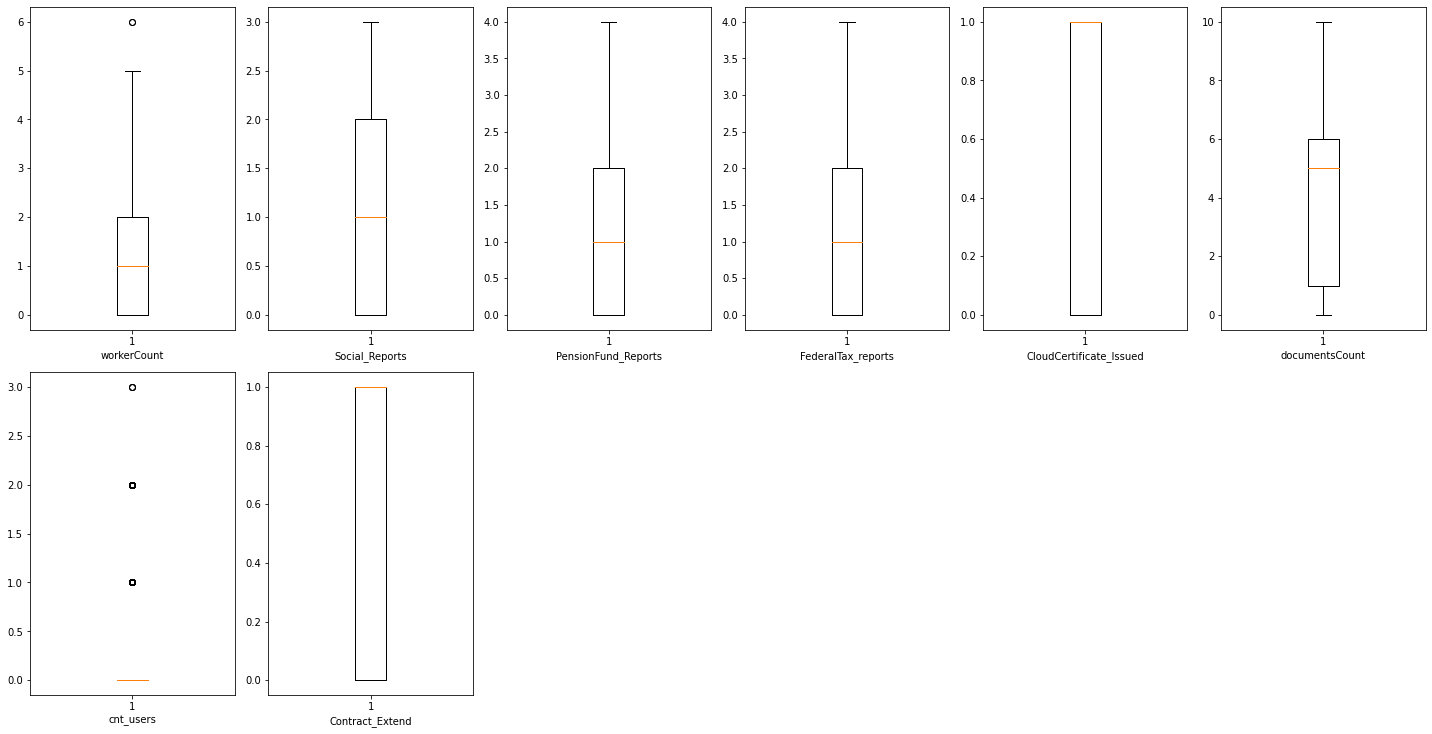

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
#row = 5
#col = 5
## shape = total columns in data
### shape = row*col
#for i, col in enumerate(contract.columns,1):
#for i, col in enumerate(contract.columns,1):
#    plt.subplot(9,9, i)
#    plt.boxplot(contract[col])
#    plt.xlabel(col)
#plt.tight_layout()
for i, col in enumerate(contract.columns,1):
    if(i<9):
      plt.subplot(4,6, i)
      plt.boxplot(contract[col])
      plt.xlabel(col)
plt.tight_layout()


**Creating the functions to find the min and max values by using the IQR formula i.e "IQR= Q3 - Q1".**

In [ ]:
# For condition column remove outliers
# Find Q1 and Q3 and IQR= Q3-Q1 
# min_val = Q1 - 1.5 IQR
# max_val = Q3 + 1.5 IQR

def calc_limits_IQR(contract, column):
    q1,q3 = contract[column].quantile([0.25,0.75])
    iqr = q3-q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    return min_val, max_val

In [ ]:
#calc_limits_IQR(contract,'taxactionSystem')

In [ ]:
#contract['taxactionSystem'].describe()

#**Splitting the DATA into Train and Test**

In [8]:
#First Seperate out the data in features X and Class variable Y
Y = contract['Contract_Extend']
X = contract.drop(['Contract_Extend'], axis = 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=7)

In [ ]:
#output df_impute
def impute_outliers(X_train,Y_train):
    for col in X_train.columns:
        min_l, max_l = calc_limits_IQR(X_train,col)
        X_train.loc[X_train[col] > max_l, col] = max_l
        X_train.loc[X_train[col] < min_l, col] = min_l
    return X_train,Y_train

In [ ]:
#X_train_impute,Y_train_impute = impute_outliers(X_train.copy(),Y_train.copy())

In [ ]:
#X_train_impute[['taxactionSystem']].boxplot()

**Feature Scaling of the data using the StandardScalar Function..**

In [ ]:
#feature Scaling using StandardScaler
#SS=(contract-contract.mean())/contract.std()   
#from sklearn.preprocessing import StandardScaler    
#caling= StandardScaler()    
#X_train= scaling.fit_transform(X_train)     
#X_test= scaling.transform(X_test)  

#**Creating a MODELS**

**Function for Model**

In [10]:
def get_Accuracy(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [11]:
score=[]

**1. Logistic Regression** (Using Default Parameters)


In [17]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=7,max_iter=500)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Predicting the test set result  
y_pred= classifier.predict_proba(X_test)  
y_pred

array([[0.17885831, 0.82114169],
       [0.58982411, 0.41017589],
       [0.62327654, 0.37672346],
       ...,
       [0.34403762, 0.65596238],
       [0.16581465, 0.83418535],
       [0.27937013, 0.72062987]])

In [14]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
cm= confusion_matrix(Y_test,y_pred)  
acc = accuracy_score(Y_test,y_pred)
print(acc)
print(cm)
score.append(acc)
print(classification_report(Y_test, y_pred))#, target_names='Contract_Extend'))

0.7014162077104642
[[ 554  463]
 [ 296 1229]]
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1017
           1       0.73      0.81      0.76      1525

    accuracy                           0.70      2542
   macro avg       0.69      0.68      0.68      2542
weighted avg       0.70      0.70      0.70      2542



**Parameter Tuning of Logistic Reg.**


In [15]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=7,penalty='l1',solver='liblinear')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Predicting the test set result  
y_pred1= classifier.predict(X_test)  
y_pred1                              

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
cm= confusion_matrix(Y_test,y_pred1)  
cm
acc = accuracy_score(Y_test,y_pred1)
print(acc)
#score.append(acc)

0.7018095987411487


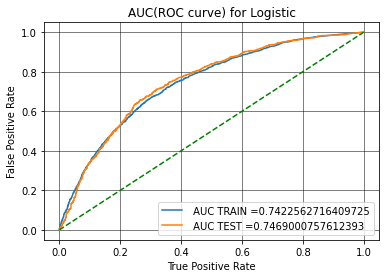

In [25]:
from sklearn.metrics import roc_curve, auc
y_train_pred = classifier.decision_function(X_train)    
y_test_pred = classifier.decision_function(X_test) 


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for Logistic")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**GridSearching**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25],'solver':['liblinear'],'max_iter':[500,1000]}
grid_clf_acc = GridSearchCV(classifier, param_grid = grid_values,scoring = 'recall')
#grid_clf_acc = GridSearchCV(classifier, param_grid = grid,scoring = 'accuracy')
grid_clf_acc.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=7, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
y_pred_acc = grid_clf_acc.predict(X_test)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
#print('Recall Score : ' + str(recall_score(Y_test,y_pred)))
#print('F1 Score : ' + str(f1_score(Y_test,y_pred)))


Accuracy Score : 0.6742722265932337
Precision Score : 0.6605251036388761


***Cross Validation on Logistic regression***

In [ ]:
from sklearn.model_selection import KFold
scores_logistic = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X,Y):
  X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], \
                                     Y.iloc[train_index], Y.iloc[test_index]
  scores_logistic.append(get_Accuracy(LogisticRegression(max_iter=500), X_train, X_test, Y_train, Y_test))  
print(scores_logistic)
l=scores_logistic
print('Average Accuracy:',np.average(l))

[0.5290068829891839, 0.7084562438544739, 0.7487708947885939, 0.7575012297097885, 0.7329070339399901]
Average Accuracy: 0.695328457056406


**2. Decision Tree (Default Parameters)**

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

In [55]:
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
# Predict using Decision Tree Model
Y_pred_DT = model_DT.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_pred_DT)

# Calculate Accuracy
acc_DT = accuracy_score(Y_test,Y_pred_DT)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy of DT : ",acc_DT)

Confusion Matrix 
 [[ 587  430]
 [ 454 1071]]
Accuracy of DT :  0.6522423288749016


**Grid Search**

In [58]:
from sklearn.model_selection import GridSearchCV
grid_values = {'criterion':['gini', 'entropy'],'max_depth': [2,6,8,10,12]}
grid_DT_acc = GridSearchCV(model_DT, param_grid = grid_values,scoring = 'recall')
grid_DT_acc.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [59]:
# Viewing The Best Parameters
print('Best Criterion:', grid_DT_acc.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_DT_acc.best_estimator_.get_params()['max_depth'])

Best Criterion: entropy
Best max_depth: 6


In [60]:
y_pred_DT_acc = grid_DT_acc.predict(X_test)

In [61]:
Acc=accuracy_score(Y_test,y_pred_DT_acc)
score.append(Acc)

In [62]:
print('Accuracy of DT after Tuning: ' + str(accuracy_score(Y_test,y_pred_DT_acc)))

Accuracy of DT after Tuning: 0.7273800157356413


***Cross Validation on Decision Tree***

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores_DT=[]
for train_index, test_index in kf.split(X,Y):
  X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], \
                                     Y.iloc[train_index], Y.iloc[test_index]
  scores_DT.append(get_Accuracy(DecisionTreeClassifier(criterion='entropy',max_depth= 6), X_train, X_test, Y_train, Y_test))
print(scores_DT)
DT=scores_DT
np.average(DT)

[0.5211406096361848, 0.7222222222222222, 0.7856440511307768, 0.7712739793408756, 0.7766847024102311]


0.7153931129480582

**3. K-NN Algorithm**

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10, p=2 )  
classifier.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Predicting the test set result  
y_pred_KNN= classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,y_pred_KNN)

# Calculate Accuracy
acc_KNN = accuracy_score(Y_test,y_pred_KNN)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc_KNN)
score.append(acc_KNN)

Confusion Matrix 
 [[446 379]
 [245 963]]
Accuracy :  0.6930644367929168


***Cross Validation of KNN***

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores_KNN=[]
for train_index, test_index in kf.split(X,Y):
  X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], \
                                     Y.iloc[train_index], Y.iloc[test_index] 
  scores_KNN.append(get_Accuracy(KNeighborsClassifier(n_neighbors=10, p=2 ), X_train, X_test, Y_train, Y_test))
print(scores_KNN)
KNN=scores_KNN
np.average(KNN)

[0.5206489675516224, 0.6843657817109144, 0.7045231071779744, 0.7127397934087555, 0.6930644367929168]


0.6630684173284367

**4. Support Vector Machine(SVC)**

In [64]:
from sklearn.svm import SVC
model = SVC(C=150,gamma='scale',random_state=8) # Support vector classifier

In [65]:
model.fit(X_train,Y_train)

SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [66]:
Y_pred_SVC = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,Y_pred_SVC)

# Calculate Accuracy
acc_SVC = accuracy_score(Y_test,Y_pred_SVC)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy Score: ",acc_SVC)
print('Precision Score : ' + str(precision_score(Y_test,Y_pred_SVC)))
print('Recall Score : ' + str(recall_score(Y_test,Y_pred_SVC)))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred_SVC)))
score.append(acc_SVC)

Confusion Matrix 
 [[ 603  414]
 [ 257 1268]]
Accuracy Score:  0.7360346184107003
Precision Score : 0.7538644470868014
Recall Score : 0.8314754098360656
F1 Score : 0.790770190208918


***Cross Validation of SVM***

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
scores_svm = []
for train_index, test_index in kf.split(X,Y):
  X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], \
                                     Y.iloc[train_index], Y.iloc[test_index] 
  scores_svm.append(get_Accuracy(SVC(gamma='auto'), X_train, X_test, Y_train, Y_test))
print(scores_svm)
sv=scores_svm
np.average(sv)

[0.5270403146509341, 0.5309734513274337, 0.6912487708947886, 0.767944936086529, 0.7767944936086529, 0.7915437561455261, 0.7649950835791544, 0.7935103244837758, 0.7844488188976378, 0.7608267716535433]


0.7189326721327977

**Grid Searching**

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.1,10,100,1000],'gamma':['scale']}
model_grid =SVC()

model_cv=GridSearchCV(model,param_grid=params,
                      verbose=1,return_train_score=True)

In [ ]:
model_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=100, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000], 'gamma': ['scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [ ]:
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']
print("The highest test accuracy is {0} at C={1}".format(best_score ,best_C))

The highest test accuracy is 0.7126547349383567 at C=100


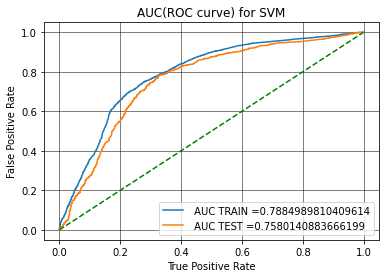

In [69]:
from sklearn.metrics import roc_curve, auc
y_train_pred = model.decision_function(X_train)    
y_test_pred = model.decision_function(X_test) 


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for SVM")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

**5. Random Forest Algorithm**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc=RandomForestClassifier(n_estimators= 100, criterion="entropy")

In [77]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_pred_RF= rfc.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(Y_test,y_pred_RF)

# Calculate Accuracy
acc_RF = accuracy_score(Y_test,y_pred_RF)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc_RF)
score.append(acc_RF)

Confusion Matrix 
 [[ 553  464]
 [ 307 1218]]
Accuracy :  0.6966955153422502


***Cross Validation on  Random Forest***

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores_rf=[]
for train_index, test_index in kf.split(X,Y):
  X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], \
                                     Y.iloc[train_index], Y.iloc[test_index] 
  scores_rf.append(get_Accuracy(RandomForestClassifier(n_estimators=200), X_train, X_test, Y_train, Y_test))
print(scores_rf)
rf=scores_rf
np.average(rf)

[0.5147492625368731, 0.6956735496558505, 0.76007866273353, 0.7319232661091982, 0.7289719626168224]


0.6862793407304548

#*Creating Function For Model Accuracy

In [ ]:
def get_Accuracy(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [ ]:
get_Accuracy(SVC(),X_train, X_test, Y_train, Y_test,)

0.7712739793408756

**6.Cat Boosting**

In [82]:
!pip install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


In [85]:
from catboost import CatBoostClassifier

In [86]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [87]:
cbc = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

In [88]:
cbc.fit(
    X_train, Y_train,
    cat_features=cat_features,
    eval_set=(X_test, Y_test),
    verbose=False,
)

In [89]:
print('CatBoost model is fitted: ' + str(cbc.is_fitted()))
print('CatBoost model parameters:')
print(cbc.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 50, 'learning_rate': 0.1, 'random_seed': 42, 'custom_loss': ['AUC', 'Accuracy']}


In [90]:
print(cbc.predict_proba(data=X_test))

[[0.19681389 0.80318611]
 [0.65615102 0.34384898]
 [0.46675358 0.53324642]
 ...
 [0.26881426 0.73118574]
 [0.2016221  0.7983779 ]
 [0.2011955  0.7988045 ]]


In [91]:
Y_pred_CBC = cbc.predict(data=X_test)

In [92]:
acc_CB=accuracy_score(Y_test,Y_pred_CBC)
score.append(acc_CB)
print('Accuracy:',acc_CB)

Accuracy: 0.7340676632572777


***Checking the values in the list Score***

In [ ]:
score

[0.7014162077104642,
 0.7766847024102311,
 0.6930644367929168,
 0.7820954254795868,
 0.7273622047244095,
 0.7816035415641909]

In [ ]:
names = ["Logistic_regression", "Decision_Tree", "KNN", "SVM", "Random_Forest","Cat_Boost"]
df = pd.DataFrame()
df['Models_name'] = names
df['score'] = score
df

,Models_name,score
0,Logistic_regression,0.701416
1,Decision_Tree,0.776685
2,KNN,0.693064
3,SVM,0.782095
4,Random_Forest,0.727362
5,Cat_Boost,0.781604


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Models_name,score
0,Logistic_regression,0.701416
1,Decision_Tree,0.776685
2,KNN,0.693064
3,SVM,0.782095
4,Random_Forest,0.727362
5,Cat_Boost,0.781604


**Observation: -**

From above table we can oberserve there is dark color in row num=3. So the highest accuracy as compared to the other classification algorithm is SVM 78.20%.

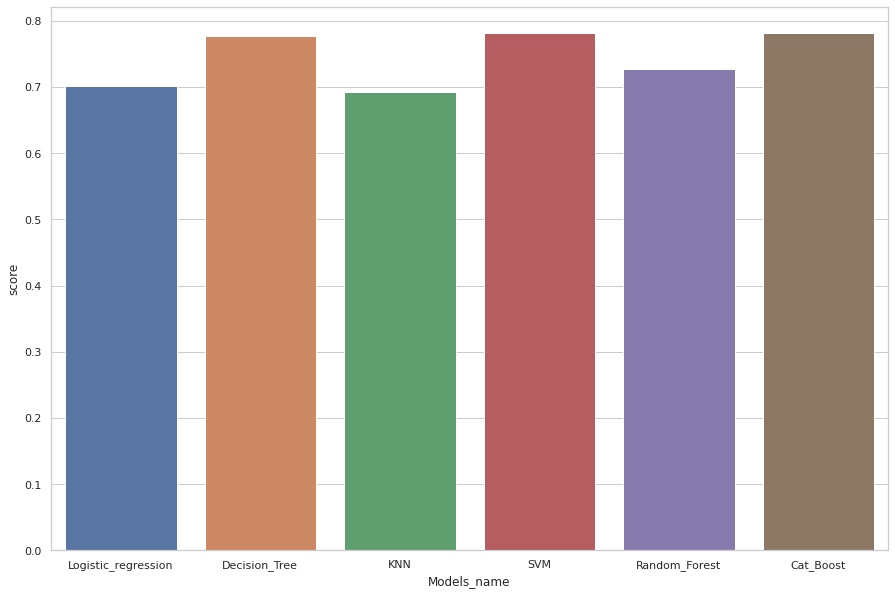

In [ ]:
sns.set(style="whitegrid")
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax =sns.barplot(y="score", x="Models_name",ax=ax, data=df)

#**CONCLUSION**:-
After comparing all the accuracy of algorithm we can say that SVM and Cat_boost are giving the best accuracy.
We applied some hyperparameter tuning and validation we can say that SUpport Vector Machine is the Best algorithm for our MODEL. 